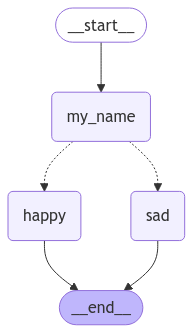

In [16]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END
import random
from IPython.display import display, Image

class MyTypedDictState(TypedDict):
    name: str
    mood: Literal["happy","sad"]

# Node takes a state object and returns an updated state object
# In our case, state object that my graph is tracking is a Dictionary object as defined in MyTypedDictState class
def my_name(state):
    print('Node 1 hit:')
    return {"name":state["name"]+"'s mood is: "}

def happy(state):
    print('Happy node hit:')
    return {"mood":"happy"}

def sad(state):
    print('Sad node hit:')
    return {"mood":"sad"}

def decide_mood(state)->Literal["happy", "sad"]:
    value = random.random()
    print(f'Condition node hit: Random value: {value}')
    if value > 0.5:
        return "happy"
    else:
        return "sad"

builder = StateGraph(MyTypedDictState)
builder.add_node("my_name", my_name)
builder.add_node("happy", happy)
builder.add_node("sad", sad)

builder.add_edge(START, "my_name")
builder.add_conditional_edges("my_name", decide_mood)
builder.add_edge("happy", END)
builder.add_edge("sad", END)

graph = builder.compile()


display(Image(graph.get_graph().draw_mermaid_png()))




In [18]:
response = graph.invoke({"name":"Chirantan","mood":"happy"})
response

Node 1 hit:
Condition node hit: Random value: 0.5468440489406521
Happy node hit:


{'name': "Chirantan's mood is: ", 'mood': 'happy'}

### Lets pass a bad state and verify if there are any runtime errors

In [20]:
response = graph.invoke({"name":"Chirantan","mood":"bad"})
response

Node 1 hit:
Condition node hit: Random value: 0.7607534554645327
Happy node hit:


{'name': "Chirantan's mood is: ", 'mood': 'happy'}

## Python dataclasses or Pydantic to the rescue